# Importing the libraries

In [124]:
import pandas as pd
import numpy as np

# Importing the dataset

In [125]:
df = pd.read_csv('../Data/results_v6.csv')
df.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
51219,Rogue,26,17,3,Bard,22,16,3,Paladin,30,...,14,3,2,Young Brass Dragon,6.00,17,110,dragon,0.000000,4
39963,Barbarian,25,17,2,Rogue,15,16,2,Paladin,22,...,11,2,10,Velociraptor,0.25,13,10,beast,0.803656,2
53886,Bard,36,13,3,Artificer,46,15,3,Barbarian,46,...,15,3,1,Armanite,7.00,16,94,fiend,0.479019,5
25397,Barbarian,37,13,3,Cleric,26,18,3,Rogue,28,...,12,3,1,Beholder Zombie,5.00,15,93,undead,0.928958,4
48875,Cleric,7,15,2,Sorcerer,9,15,2,Paladin,9,...,15,2,10,Rust Monster,0.50,14,27,monstrosity,0.000000,1


# Cleaning the data

## Dropping the columns that wont help in prediction

In [126]:
df.drop(columns=['monster_name'], inplace=True)
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


## Dropping miswrote data


In [127]:
df.p1_class.value_counts()

p1_class
Rogue        5328
Wizzard      5314
Paladin      5268
Artificer    5246
Cleric       5244
Warlock      5233
Druid        5203
Sorcerer     5197
Fighter      5195
Ranger       5192
Monk         5177
Bard         5129
Barbarian    5104
Name: count, dtype: int64

In [128]:
df = df[df['p1_class'] != '22']
df = df[df['dificulty'] >= 0]
df = df[df['monster_cr'] != -1]
df = df[df['players_level'] <= 5]
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [191]:
corr_matrix = df.corr(numeric_only=True)
abs(corr_matrix['dificulty']).sort_values(ascending = False).head(20)

dificulty          1.000000
num_of_monsters    0.253943
players_level      0.180134
p3_hp              0.177627
p1_hp              0.177555
p4_hp              0.177066
p2_hp              0.175795
p2_avg_save        0.147260
p3_avg_save        0.147260
p4_avg_save        0.147260
p1_avg_save        0.147260
monster_hp         0.091391
monster_cr         0.048792
monster_ac         0.044074
p1_ac              0.037208
p4_ac              0.036301
p3_ac              0.033209
p2_ac              0.030426
Name: dificulty, dtype: float64

# Sampling the data

In [129]:
X = df.drop(columns=['dificulty'])
X.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
13973,Rogue,25,12,3,Rogue,30,14,3,Warlock,24,...,Paladin,24,17,3,10,0.50,15,16,construct,3
66811,Monk,26,11,3,Barbarian,51,17,3,Sorcerer,16,...,Druid,36,11,3,10,0.25,13,7,dragon,4
20845,Artificer,32,17,3,Sorcerer,23,13,3,Barbarian,48,...,Artificer,37,12,3,10,0.25,11,13,humanoid,5
58638,Cleric,7,20,2,Ranger,8,12,2,Fighter,8,...,Monk,10,16,2,1,2.00,17,32,dragon,1
29864,Cleric,32,12,3,Warlock,39,14,3,Ranger,50,...,Sorcerer,29,15,3,3,5.00,9,93,construct,5


In [130]:
Y = df['dificulty'].copy()
Y.sample(5)

32651    0.368486
59993    0.000000
67355    0.116922
17499    0.000000
60271    1.000000
Name: dificulty, dtype: float64

# One hot encoding the categorical data

In [131]:
X = pd.get_dummies(X, columns=[ 'p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
X.sample(5)

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
46639,24,13,2,9,12,2,15,11,2,22,...,False,False,False,False,False,False,False,False,False,False
2489,35,10,3,48,12,3,48,16,3,50,...,False,False,False,False,False,True,False,False,False,False
21970,40,17,3,42,13,3,25,16,3,43,...,True,False,False,False,False,False,False,False,False,False
54582,22,15,3,27,16,3,23,11,3,25,...,False,False,False,False,True,False,False,False,False,False
53944,25,14,3,24,11,3,27,15,3,21,...,False,False,False,False,False,False,False,False,False,False


In [132]:
print(len(Y))
print(len(X))

67642
67642


# Splitting the dataset into the Training set and Test set

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Fitting the XGBoost Regression to the dataset

In [134]:
import xgboost as xgb

clfXGB = xgb.XGBRegressor(early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
clfXGB.fit( X_train,
            Y_train,
            verbose=100,
            eval_metric='rmse',
            eval_set=[(X_train, Y_train),(X_test, Y_test)]
            )

[0]	validation_0-rmse:0.35001	validation_1-rmse:0.34853


c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:0.16489	validation_1-rmse:0.18992


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None,
             eval_set=[(       p1_hp  p1_ac  p1_avg_save  p2_hp  p2_ac  p2_avg_save  p3_hp  p3_ac  \
9637      21     14            3     25     18            3     18     14   
29540     29     18            3     23     13            3     19     15   
24492     15     14            2     20     17            2     19     14   
44027     30     16            3     26     17            3     18     10   
55078     28     1...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Predicting the using the model

In [135]:
from random import randint

def predict(model):
    input_test = randint(0, len(X_test))
    row_input = pd.DataFrame(X.iloc[input_test]).T
    print('Input: ')
    display(row_input)
    print(f'The combat was btween 4 players level {row_input.players_level.values[0]} against {row_input.num_of_monsters.values[0]} monster(s) CR {row_input.monster_cr.values[0]}')
    print('Expected: ', Y.iloc[input_test])
    print('Predicted: ', model.predict(row_input.values)[0])

In [136]:
pd.DataFrame(X.iloc[0]).T

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,38,12,3,38,13,3,51,17,3,43,...,False,True,False,False,False,False,False,False,False,False


In [208]:
predict(clfXGB)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
1253,4,14,2,5,14,2,6,13,2,9,...,True,False,False,False,False,False,False,False,False,False


The combat was btween 4 players level 1 against 1 monster(s) CR 2.0
Expected:  0.5214588634435962
Predicted:  0.64512587


# Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

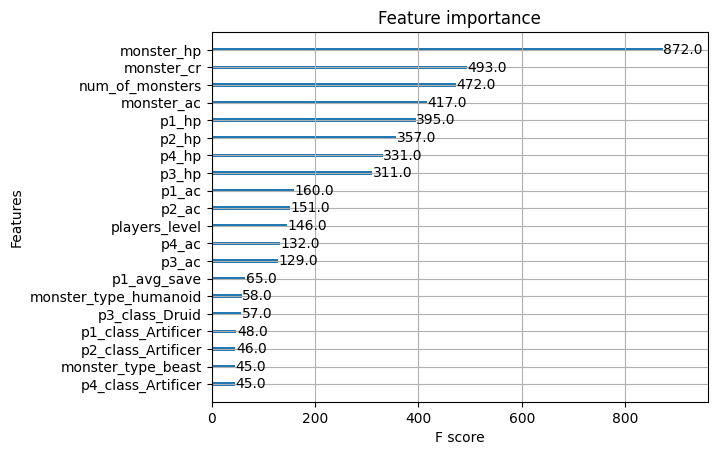

In [209]:
from xgboost import plot_importance

plot_importance(clfXGB, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using GridSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV

def parameter_search(params):
    search = GridSearchCV(xgb.XGBRegressor(
                            subsample=0.9,
                            colsample_bytree=0.5,
                            ),
                            param_grid=params,
                            scoring=['r2','neg_mean_squared_error'],
                            refit='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=4)
    search.fit(X_train, Y_train)
    print(search.best_score_)
    return search.best_params_

## Round 1

In [140]:
search_sapce = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5],
    'base_score': [0.2, 0.5, 0.8],
}

parameter_search(search_sapce)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

## Round 2

In [ ]:
search_sapce = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5,7,9],
    'learning_rate': [0.1, 0.25, 0.5],
    'gamma': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
    'base_score': [0.5],
}

parameter_search(search_sapce)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0.8063109346144334


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 400,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

## Round 3

In [ ]:
params = {
    'n_estimators': [400, 650, 800],
    'max_depth': [9,10,11],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
    'base_score': [0.5],
}

parameter_search(params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8096820822900176


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 800,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

## Round 4

In [ ]:
params = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [9],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
    'base_score': [0.5],
}

parameter_search(params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8100256530627407


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 1200,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

In [141]:
FINAL_PARAMETERS = {'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 1200,
 'reg_lambda': 1,
 'scale_pos_weight': 1
 }

## Making the regression model

In [210]:
model_GCV = xgb.XGBRegressor(**FINAL_PARAMETERS, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_GCV.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
            
          )

[0]	validation_0-rmse:0.42509	validation_1-rmse:0.42449
[100]	validation_0-rmse:0.12912	validation_1-rmse:0.18551
[181]	validation_0-rmse:0.09995	validation_1-rmse:0.17509


XGBRegressor(base_score=0.7000000000000001, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.010640880934863295, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.125, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=487, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [194]:
model_GCV.score(X_test, Y_test)

0.8065665644110817

## Making predictions

In [227]:
predict(model_GCV)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
7943,27,12,3,24,15,3,24,13,3,24,...,True,False,False,False,False,False,False,False,False,False


The combat was btween 4 players level 3 against 2 monster(s) CR 2.0
Expected:  0.3141534391534392
Predicted:  0.49753624


## Seeing the model feature importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

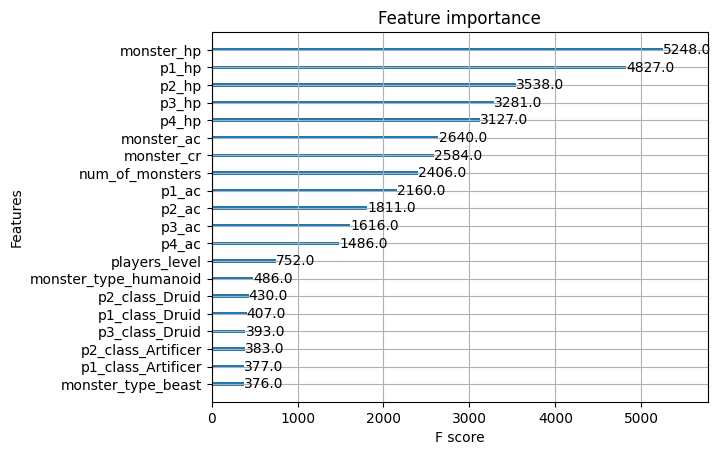

In [243]:
plot_importance(model_GCV, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using Optuna

In [168]:
import optuna

In [169]:
from sklearn.metrics import mean_squared_error
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)

In [170]:
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-11-24 16:29:37,781] A new study created in memory with name: regression
[I 2023-11-24 16:29:39,275] Trial 0 finished with value: 0.09400201345969166 and parameters: {'max_depth': 1, 'learning_rate': 0.045000000000000005, 'n_estimators': 723, 'gamma': 0.18116928107643374, 'reg_lambda': 0.2842970814022444, 'scale_pos_weight': 4.708568293561297, 'base_score': 0.2}. Best is trial 0 with value: 0.09400201345969166.
[I 2023-11-24 16:29:40,737] Trial 1 finished with value: 0.06517752234364872 and parameters: {'max_depth': 2, 'learning_rate': 0.09, 'n_estimators': 667, 'gamma': 0.17743439856768967, 'reg_lambda': 0.0329993499429122, 'scale_pos_weight': 3.2804723359398724, 'base_score': 0.6}. Best is trial 1 with value: 0.06517752234364872.
[I 2023-11-24 16:29:41,697] Trial 2 finished with value: 0.05984708448879176 and parameters: {'max_depth': 5, 'learning_rate': 0.09, 'n_estimators': 271, 'gamma': 0.9501678642968386, 'reg_lambda': 0.3058126531221151, 'scale_pos_weight': 8.404824175924

In [180]:
study.best_params


{'max_depth': 9,
 'learning_rate': 0.125,
 'n_estimators': 487,
 'gamma': 0.010640880934863295,
 'reg_lambda': 0.11147080571581364,
 'scale_pos_weight': 1.0065977727703983,
 'base_score': 0.7000000000000001}

## Making the regression model

In [198]:
FINAL_PARAMETERS = study.best_params

model_OPT = xgb.XGBRegressor(**FINAL_PARAMETERS, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
          )

[0]	validation_0-rmse:0.42509	validation_1-rmse:0.42449
[100]	validation_0-rmse:0.12912	validation_1-rmse:0.18551
[182]	validation_0-rmse:0.09995	validation_1-rmse:0.17509


XGBRegressor(base_score=0.7000000000000001, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.010640880934863295, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.125, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=487, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [199]:
model_OPT.score(X_test, Y_test)

0.8065665644110817

## Making predictions

In [252]:
predict(model_OPT)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
10098,22,16,3,30,16,3,16,10,3,25,...,False,False,False,False,False,False,False,False,False,False


The combat was btween 4 players level 3 against 10 monster(s) CR 0.0
Expected:  0.0
Predicted:  0.20031352


## Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

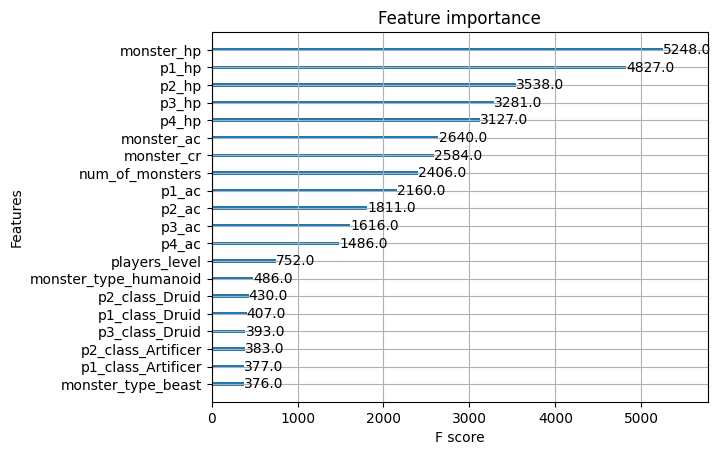

In [242]:
plot_importance(model_OPT, max_num_features=20, importance_type='weight')